# Pre-acknowledgement about data challenge
CleverCogs is Blackwood’s digitally enhanced care system.
Its purpose is to keep people independent, in control and in their home.
The data are the usage records from tablets installed CleverCogs system with a very simplified interface design here to enable older people
and people with disabilities to access things easily, perhaps they could use a standard tablet.

More about dataset:
- The data set should contain 8 Columns are 'Time', 'VisitorID', ..., 'ContentInfo'
- Columns might appear reasonable `nan`s:
    - 'ExternalID', ExternalID=NaN # care home customers
    - 'Building',
    - 'ContentInfo'


# Setup

In [1]:
#Necessary import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


First, load the data, from the supplied data file

In [2]:
# Read in data
activity_dframe = pd.read_excel('CC Data 2020.xlsx', sheet_name=0)

In [3]:
# Have a look at the data set including size of it and general type of data
activity_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314766 entries, 0 to 314765
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         314766 non-null  object 
 1   VisitorID    314734 non-null  object 
 2   ExternalID   220993 non-null  float64
 3   Unnamed: 3   314734 non-null  object 
 4   Unnamed: 4   311515 non-null  object 
 5   LinkTitle    314734 non-null  object 
 6   LinkType     314734 non-null  object 
 7   ContentInfo  11575 non-null   object 
 8   Unnamed: 8   236 non-null     object 
 9   Unnamed: 9   30 non-null      object 
 10  Unnamed: 10  5 non-null       object 
 11  Unnamed: 11  5 non-null       object 
 12  Unnamed: 12  5 non-null       object 
 13  Unnamed: 13  5 non-null       object 
 14  Unnamed: 14  5 non-null       object 
 15  Unnamed: 15  5 non-null       object 
 16  Unnamed: 16  5 non-null       object 
dtypes: float64(1), object(16)
memory usage: 40.8+ MB


In [4]:
# Check the missing data
# For those columns missing much data, make sure whether to analyse and drop
activity_dframe.isna().sum().sort_values(ascending=False)

Unnamed: 16    314761
Unnamed: 15    314761
Unnamed: 14    314761
Unnamed: 13    314761
Unnamed: 12    314761
Unnamed: 11    314761
Unnamed: 10    314761
Unnamed: 9     314736
Unnamed: 8     314530
ContentInfo    303191
ExternalID      93773
Unnamed: 4       3251
LinkType           32
LinkTitle          32
Unnamed: 3         32
VisitorID          32
Time                0
dtype: int64

From the above information, I am going to explore and clean the data set in the following steps:
- Give the name to the column 3 and column 4
- Look into the extra columns from column 8 to column 16, there are many `nan`s in those columns
- Look at the unexpected `nan`s in some columns
- Look at few columns to see whether they are messy or not
- Convert the data type of the columns

# Explore and clean

### 1. Add names to columns 3 and 4 according to the previous year's dataset file

In [5]:
activity_dframe.rename(columns={'Unnamed: 3': 'Role','Unnamed: 4':'Building'}, inplace=True)

### 2.0 Extra columns and `nan`s

After checking missing data from the Setup section, there were unexpected `nan`s in
the columns (i.e., `VisitorID`, `Role`, `Linktitle`, `LinkType`) and many `nan`s in last few columns
- Column 10 to 16 have the same number of `nan`- 314761, not `nan`s' counts are 5 seperately
- Column 8 and 9 have the different and larger number of `nan`s
- First four of columns have the same number of `nan`- 32

### 2.1 Look into extra column 8 to column 16

First, dealing with column 10 to 16

In [6]:
nnan_extra_col_rows_bool = ~pd.isna(activity_dframe['Unnamed: 16'])

activity_dframe[nnan_extra_col_rows_bool]

,Time,VisitorID,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
50042,2020-07-22 12:58:44.123000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI,Roboto,Oxygen,Ubuntu,Fira Sans,Droid Sans,Helvetica Neue,"sans-serif""><span style=""font-weight: 400;"">&..."
55557,2020-07-10 10:26:46.240000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI,Roboto,Oxygen,Ubuntu,Fira Sans,Droid Sans,Helvetica Neue,"sans-serif""><span style=""font-weight: 400;"">&..."
55559,2020-07-10 10:26:18.920000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI,Roboto,Oxygen,Ubuntu,Fira Sans,Droid Sans,Helvetica Neue,"sans-serif""><span style=""font-weight: 400;"">&..."
55612,2020-07-10 10:01:37.970000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI,Roboto,Oxygen,Ubuntu,Fira Sans,Droid Sans,Helvetica Neue,"sans-serif""><span style=""font-weight: 400;"">&..."
55613,2020-07-10 10:00:51.627000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI,Roboto,Oxygen,Ubuntu,Fira Sans,Droid Sans,Helvetica Neue,"sans-serif""><span style=""font-weight: 400;"">&..."


From the above DataFrame, there were incorrect splitting for the 'ContentInfo' due to the delimiter within the values.

I am going to combine the column 9 with extra columns after it and drop the extra columns.

In [7]:
for i in range(10,17):
    activity_dframe['Unnamed: 9'][nnan_extra_col_rows_bool] += activity_dframe[nnan_extra_col_rows_bool].iloc[:,i]

activity_dframe.drop(activity_dframe.iloc[:, 10:17], axis=1, inplace=True)

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
activity_dframe[nnan_extra_col_rows_bool]

,Time,VisitorID,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,Unnamed: 8,Unnamed: 9
50042,2020-07-22 12:58:44.123000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55557,2020-07-10 10:26:46.240000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55559,2020-07-10 10:26:18.920000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55612,2020-07-10 10:01:37.970000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55613,2020-07-10 10:00:51.627000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...


Second, dealing with column 9

In [9]:
nnan_extra_col_rows_bool = ~pd.isna(activity_dframe['Unnamed: 9'])
activity_dframe[nnan_extra_col_rows_bool]

,Time,VisitorID,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,Unnamed: 8,Unnamed: 9
50042,2020-07-22 12:58:44.123000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55557,2020-07-10 10:26:46.240000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55559,2020-07-10 10:26:18.920000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55612,2020-07-10 10:01:37.970000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
55613,2020-07-10 10:00:51.627000,47518EC5-3B0A-471A-9CC3-1C4C02675948,5087.0,User,Night Support Service,Mr. Robot HTML test,Standard page,"<font color=""#172b4d"" face=""-apple-system",BlinkMacSystemFont,Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid...
100316,2020-04-19 17:34:35.037000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Dave Dee,Dozy,Beaky,Mick & Tich,Internet
205739,2019-07-08 20:39:08.513000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Dave Dee,Dozy,Beaky,Mick & Tich,Internet
206179,2019-07-08 00:02:56.517000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Dave Dee,Dozy,Beaky,Mick & Tich,Internet
211223,2019-06-24 16:14:00.993000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Dave Dee,Dozy,Beaky,Mick & Tich,Internet
212189,2019-06-21 23:57:11.613000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Dave Dee,Dozy,Beaky,Mick & Tich,Internet


In [10]:
activity_dframe['Unnamed: 9'][nnan_extra_col_rows_bool].unique()

array([' Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid Sans Helvetica Neue sans-serif"><span style="font-weight: 400;">&lt;center&gt;&lt;iframe width="560" height="315" src="https://www.youtube.c',
       'Internet'], dtype=object)

From the above array, the first value started with space and should be combined with previous column.
And `Internet` should be `LinkType` and there are incorrect splitting in the `LinkTitle` to occupy the `LinkType`,
 `ContentInfo` and `col 8` in the same rows.

In [11]:
# if True which means starting with space, then combined it with the previous col
# if False, combined previous cols (col 8, LinkType) with LinkTitle col
nnan_extra_col_rows_bool_series = activity_dframe['Unnamed: 9'][nnan_extra_col_rows_bool].str.startswith(' ')

In [12]:
# True
rows_combined_with_previous_col = nnan_extra_col_rows_bool_series[nnan_extra_col_rows_bool_series].index.values
activity_dframe['Unnamed: 8'][rows_combined_with_previous_col] += \
    activity_dframe['Unnamed: 9'][rows_combined_with_previous_col]

# Try to solve the warning but have no correct solution

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
# False
# Combine LinkType, ContentInfor and col 8 with LinkTitle
rows_replace_LinkType = nnan_extra_col_rows_bool_series[~nnan_extra_col_rows_bool_series].index.values
activity_dframe['LinkTitle'][rows_replace_LinkType] += activity_dframe['LinkType'][rows_replace_LinkType] +\
    activity_dframe['ContentInfo'][rows_replace_LinkType] +\
    activity_dframe['Unnamed: 8'][rows_replace_LinkType]

# Replace LinkType by col 9
activity_dframe['LinkType'][rows_replace_LinkType] = activity_dframe['Unnamed: 9'][rows_replace_LinkType]

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
# fillna to the cells combined to previous cols in those rows
activity_dframe['ContentInfo'][rows_replace_LinkType] = np.nan
activity_dframe['Unnamed: 8'][rows_replace_LinkType] = np.nan

# Drop extra col 9
activity_dframe.drop(['Unnamed: 9'], axis=1, inplace=True)

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Third, deal with col 8

In [15]:
nnan_extra_col_rows_bool = ~pd.isna(activity_dframe['Unnamed: 8'])
activity_dframe['Unnamed: 8'][nnan_extra_col_rows_bool].unique()

array([' or out and about in the community. Suppo', 'Internet',
       ' BlinkMacSystemFont Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid Sans Helvetica Neue sans-serif"><span style="font-weight: 400;">&lt;center&gt;&lt;iframe width="560" height="315" src="https://www.youtube.c'],
      dtype=object)

Similar process as analysing 'Unnamed: 9' column

In [16]:
# if the cell starts with space, combined it with the previous col,
# if False, combined previous cols (col 8, LinkType) with LinkTitle col
nnan_extra_col_rows_bool_series = activity_dframe['Unnamed: 8'][nnan_extra_col_rows_bool].str.startswith(' ')

# True
rows_combined_with_previous_col = nnan_extra_col_rows_bool_series[nnan_extra_col_rows_bool_series].index.values
activity_dframe['ContentInfo'][rows_combined_with_previous_col] += \
    activity_dframe['Unnamed: 8'][rows_combined_with_previous_col]

# False
# Combine LinkType, ContentInfor with LinkTitle
rows_replace_LinkType = nnan_extra_col_rows_bool_series[~nnan_extra_col_rows_bool_series].index.values
activity_dframe['LinkTitle'][rows_replace_LinkType] += activity_dframe['LinkType'][rows_replace_LinkType] +\
    activity_dframe['ContentInfo'][rows_replace_LinkType]

# Replace LinkType by col 8
activity_dframe['LinkType'][rows_replace_LinkType] = activity_dframe['Unnamed: 8'][rows_replace_LinkType]

# fillna to the cells combined to previous cols in those rows
activity_dframe['ContentInfo'][rows_replace_LinkType] = np.nan

# Drop extra col 8
activity_dframe.drop(['Unnamed: 8'], axis=1, inplace=True)

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/User

### 2.2 Look at unexpected `nan`s in columns including `VisitorID`, `Role`, `Linktitle`, `LinkType`

In [17]:
nan_visitorID_rows_bool = activity_dframe['VisitorID'].isna()
activity_dframe[nan_visitorID_rows_bool]

,Time,VisitorID,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo
55554,"src=""https://www.youtube.com/embed/sO2raiSHOhc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55555,</iframe></p></center>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55562,"src=""https://www.youtube.com/embed/sO2raiSHOhc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55563,</iframe></p></center>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55567,"src=""https://www.youtube.com/embed/sO2raiSHOhc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55568,</iframe></p></center>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55570,"src=""https://www.youtube.com/embed/sO2raiSHOhc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55571,</iframe></p></center>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55573,"src=""https://www.youtube.com/embed/sO2raiSHOhc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55574,</iframe></p></center>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
len(activity_dframe[nan_visitorID_rows_bool])

32

The rows above could be marked as a group of two according to the consecutive row index. They are part of the value in
 'ContentInfo' column from the above row.

In [19]:
extra_contentInfo_rows_index = activity_dframe[nan_visitorID_rows_bool].index.values

In [20]:
incomplete_contentInfo_rows_index_set = set(extra_contentInfo_rows_index-1)-set(extra_contentInfo_rows_index)
incomplete_contentInfo_rows_index_list = list(incomplete_contentInfo_rows_index_set)
incomplete_contentInfo_rows_index = np.array(incomplete_contentInfo_rows_index_list)

activity_dframe['ContentInfo'][incomplete_contentInfo_rows_index] += activity_dframe['Time'][incomplete_contentInfo_rows_index+1].values \
                                                                     + activity_dframe['Time'][incomplete_contentInfo_rows_index+2].values

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
activity_dframe.drop(index=extra_contentInfo_rows_index, inplace=True)
activity_dframe.reset_index(drop=True, inplace=True)

In [22]:
# Check the missing data
# For those columns missing much data, make sure whether to analyse and drop
activity_dframe.isna().sum().sort_values(ascending=False)

ContentInfo    303250
ExternalID      93741
Building         3219
LinkType            0
LinkTitle           0
Role                0
VisitorID           0
Time                0
dtype: int64

Done the work to combine the columns and dropped several rows.

### 3. Look at other columns including `ContentInfo` and `LinkType` to know if they are messy

To get a sense for whether a column has problems, I use `.unique()` to look at all its values.

#### LinkType
When I look at the unique values in "LinkType", it quickly becomes clear that this is a mess.

Some of the problem:

* Some of the link types are started with space including ` Suggestions & Complaints`, ` Mungo`, ` Wind & Fire`, ` Paper`, ` Shawlands` or ` Dozy`

What I can do:

* Look at what's up with the starting space, and decide what to do

In [23]:
activity_dframe['LinkType'].unique()

array(['Internet', 'Category', 'Radio', 'Services', 'HTML page',
       'Gallery', 'Standard page', ' Suggestions & Complaints',
       ' Wind & Fire', ' Shawlands', 'MP3 player', 'TV'], dtype=object)

What's up with the starting space in the cells?

If incorrectly split the 'LinkTitle', there would be spaces at the beginning of the 'LinkType'

In [24]:
rows_start_with_space = (activity_dframe['LinkType'].str.startswith(' '))==True
len(activity_dframe[rows_start_with_space])

15

In [25]:
activity_dframe[rows_start_with_space]

,Time,VisitorID,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo
1658,2020-10-27 07:08:27.433000,4275AC9E-2CD4-4F82-92BF-C689AC747E2A,8883.0,User,Night Support Service,Compliments,Suggestions & Complaints,Internet
6539,2020-10-16 12:58:19.667000,B4436EEF-19FA-47CF-95D5-770D843D62B3,8839.0,User,East,Compliments,Suggestions & Complaints,Internet
46480,2020-07-30 09:33:38.817000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Earth,Wind & Fire,Internet
46483,2020-07-30 09:32:43.537000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Earth,Wind & Fire,Internet
46485,2020-07-30 09:32:23.873000,C2F3C6DF-EA4E-4DFC-800A-5D5604BA4F1A,7901.0,User,Raeden Court,Earth,Wind & Fire,Internet
68661,2020-06-14 22:38:55.103000,C5873F8C-7B40-4FF1-B4BE-94AB00BB0145,NaN,User,NORTH HOUSING,Baker Street Doctor Practice,Shawlands,Internet
71457,2020-06-09 21:14:18.633000,C4BC46C0-45BC-4112-989F-29AC90535168,NaN,User,WEST HOUSING,Baker Street Doctor Practice,Shawlands,Internet
73724,2020-06-06 09:46:22.203000,D7D3E21E-3753-4C57-AE23-0BE7F7F6B384,NaN,User,EAST HOUSING,Baker Street Doctor Practice,Shawlands,Internet
74594,2020-06-05 01:30:47.220000,982F5133-626E-4FF3-BB98-8FDE7704AA92,NaN,User,NORTH HOUSING,Baker Street Doctor Practice,Shawlands,Internet
75189,2020-06-04 08:43:18.400000,679CBA7A-948B-4F2E-9432-002DDD5FFF8A,NaN,User,Broom Main Building,Baker Street Doctor Practice,Shawlands,Internet


I think there were incorrect splitting in the 'LinkTitle' column and I am going to combine 'LinkType' with 'LinkTitle'
for those rows:

In [26]:
activity_dframe['LinkTitle'][rows_start_with_space] += activity_dframe['LinkType'][rows_start_with_space]

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In those rows, replace 'Linktype' with 'ContentInfo' and fillna to 'ContentInfo'

In [27]:
activity_dframe['LinkType'][rows_start_with_space] = activity_dframe['ContentInfo'][rows_start_with_space]
activity_dframe['ContentInfo'][rows_start_with_space] = np.nan

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### ContentInfo
When I look at the unique values in `ContentInfo`, it quickly becomes clear that this is a correct column currently.

In [28]:
activity_dframe['ContentInfo'].unique()

array([nan, '-1|329|10|Comfort Break|1|', '-1|356|15|Out of Bed (2)|1|1',
       'Flash', '-1|424|10|Contact Staff|1|', '-1|332|5|Dropped Book|1|',
       '<h2>Care Standards for support services </h2><div><span style="font-weight: normal;">These care standards are for support services. Support services are sometimes called day care. Support can be given in a building or out and about in the community. Suppo',
       '-1|348|15|HELP INTO BED (2)|1|1',
       '-1|295|10| Wheel Chair Support|1|', '-1|209|30|Alarm|1|',
       '<br><center><iframe src="https://tunein.com/embed/player/s266113/" style="width:75%; height:100px;" scrolling="no" frameborder="yes"></iframe><br><img src="https://pbs.twimg.com/profile_images/945972565952122880/nm4PboD6_400x400.jpg" alt="virgin" align="mi',
       '<font color="#172b4d" face="-apple-system BlinkMacSystemFont Segoe UI Roboto Oxygen Ubuntu Fira Sans Droid Sans Helvetica Neue sans-serif"><span style="font-weight: 400;">&lt;center&gt;&lt;iframe width="

### 4. Convert the data type of the columns
Convert 'Time' column to datetime type

In [29]:
activity_dframe['Time'] = pd.to_datetime(activity_dframe['Time'])

Now that the data is clean, use some assert statements to check that it fits the picture of how the data should be.
Make sure each assert explains why it is there. I have several asserts, for all of the things that I found in the data that were strange.

In [30]:
assert len(activity_dframe.columns.values) == 8, "The DataFrame has extra columns"
assert ~(activity_dframe['VisitorID'].any in [np.nan]), "The VisitorID column has invalid nan value"
assert ~(activity_dframe['Role'].any in [np.nan]), "The Role column has invalid nan value"
assert ~(activity_dframe['LinkTitle'].any in [np.nan]), "The LinkTile column has invalid nan value"
assert ~(activity_dframe['LinkType'].any in [np.nan]), "The LinkType column has invalid nan value"

After cleaning data set, realse outdated variables to the storage

In [31]:

del extra_contentInfo_rows_index,\
    incomplete_contentInfo_rows_index,\
    incomplete_contentInfo_rows_index_list,\
    incomplete_contentInfo_rows_index_set,\
    nan_visitorID_rows_bool,\
    nnan_extra_col_rows_bool,\
    nnan_extra_col_rows_bool_series,\
    rows_combined_with_previous_col,\
    rows_replace_LinkType,\
    rows_start_with_space

---

# Describe Data

According to above cleaning steps, here is some
- The general type of the data: tabular
- How large and complex:
    - Raw data set: 314766*17
    - Cleaned data set: 314734*8
    - Each row is a recording of the usage of platform including time, two sorts of ID, role, activity info, etc.
- `VisitorID` is the identifier for the user
    - `ExternalID` can be the unique ids to the customers, while for care home customers, `ExternalID=NaN` and could use `VisitorID`
to mark as a record

In [32]:
activity_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314734 entries, 0 to 314733
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         314734 non-null  datetime64[ns]
 1   VisitorID    314734 non-null  object        
 2   ExternalID   220993 non-null  float64       
 3   Role         314734 non-null  object        
 4   Building     311515 non-null  object        
 5   LinkTitle    314734 non-null  object        
 6   LinkType     314734 non-null  object        
 7   ContentInfo  11469 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 19.2+ MB


### What is the challenge question?

Answer: Explore the usage of CleverCogs platform and measure the activity performance through timeline.

---

# Explore

How about the overall exploration about the usage date of the platform by different roles?

In [33]:
activity_dframe['Role'].value_counts()

User        313630
Support        639
Employee       465
Name: Role, dtype: int64

From the above result, there are three types of people who use CleverCogs and then next step is to look into the usage of them.

The graphs below reveal three types of roles' access to the platform during 11 months.

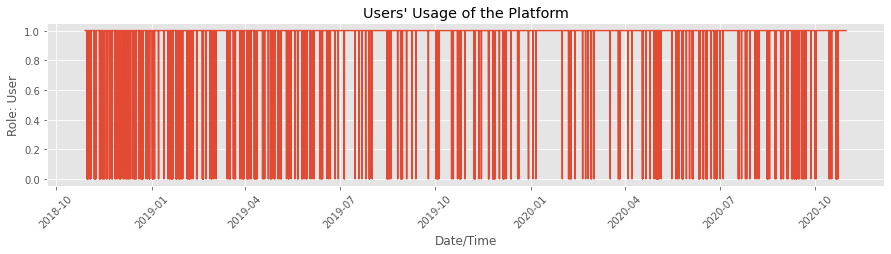

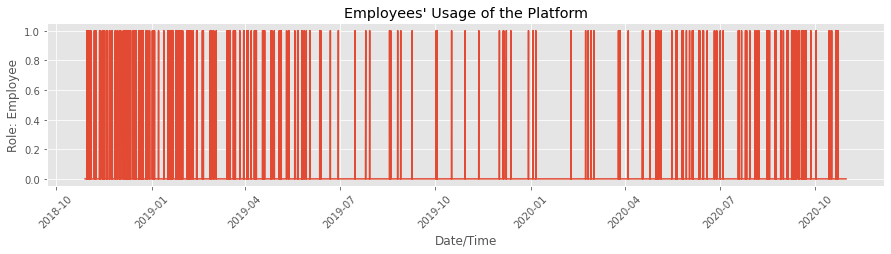

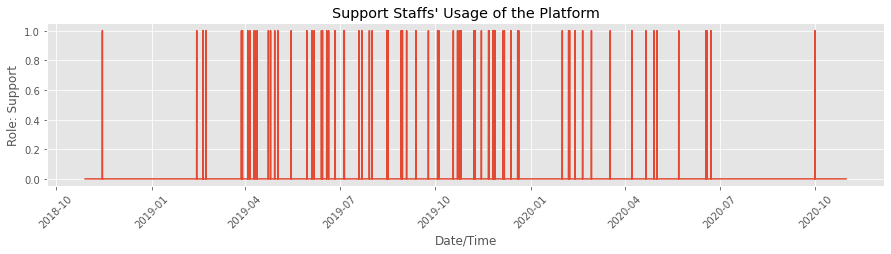

In [34]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# User
plt.plot(pd.DatetimeIndex(activity_dframe['Time']).values, activity_dframe['Role']=='User')
plt.xticks(rotation=45)
plt.xlabel("Date/Time")
plt.ylabel("Role: User")
plt.title("Users' Usage of the Platform")
plt.show()

# Employee
plt.plot(pd.DatetimeIndex(activity_dframe['Time']).values, activity_dframe['Role']=='Employee')
plt.xticks(rotation=45)
plt.xlabel("Date/Time")
plt.ylabel("Role: Employee")
plt.title("Employees' Usage of the Platform")
plt.show()

# Support
plt.plot(pd.DatetimeIndex(activity_dframe['Time']).values, activity_dframe['Role']=='Support')
plt.xticks(rotation=45)
plt.xlabel("Date/Time")
plt.ylabel("Role: Support")
plt.title("Support Staffs' Usage of the Platform")
plt.show()

___
Explanation:
- From above charts, the densest strips in the first chart mean users use the system most frequently. In second chart,
the employees often use the platform throughout the timeline. And the support staffs
use it on relatively few days
- I find there are gaps between `2020-01` and `2020-02` among three charts
- The chart of users seems to be be denser
since April in 2020 than the several months before
___

Next, I am going to explore how many person-times and users use the platform when time went by especially since 2020.
###### (The total share of employees' and support staffs' records in data set is under 0.5%, so I take them as a whole integration of user in the below explorations.)

The graphs below show the person-times and number of users over a period of 11 months.

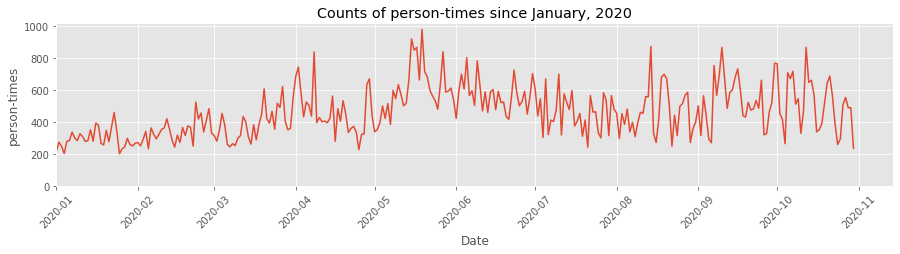

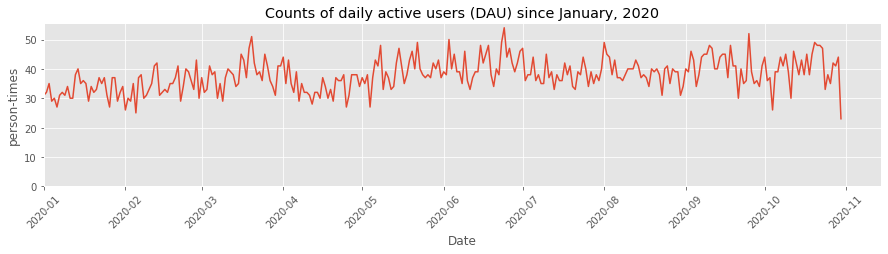

In [35]:
# Insert a column for year, month and day (%Y-%m-%d)
activity_dframe['Date'] = activity_dframe['Time'].dt.date

# Group by date and calcute the number of records
daily_counts_of_usage_2020_dframe = activity_dframe[activity_dframe['Time']>'2020-01-01'].groupby('Date', as_index=False).size()

chart = sns.lineplot(x="Date",y="size", data=daily_counts_of_usage_2020_dframe)

plt.xlim(xmin='2020-01-01')
plt.ylim(ymin=0)
plt.ylabel('person-times')
plt.xticks(rotation=45)
chart.set_title('Counts of person-times since January, 2020')
plt.show()

# Group by date and visitorID to further calculate number of different users in a day
daily_counts_of_users_2020_dframe = activity_dframe[activity_dframe['Time']>'2020-01-01'].\
    groupby(['Date', 'VisitorID'], as_index=False).size()

daily_counts_of_users_2020_dframe = daily_counts_of_users_2020_dframe.groupby('Date', as_index=False).size()

chart = sns.lineplot(x="Date",y="size", data=daily_counts_of_users_2020_dframe)

plt.xlim(xmin='2020-01-01')
plt.ylim(ymin=0)
plt.ylabel('person-times')
plt.xticks(rotation=45)
chart.set_title('Counts of daily active users (DAU) since January, 2020')
plt.show()

del daily_counts_of_users_2020_dframe, daily_counts_of_usage_2020_dframe

___
Explanation:

From chart of person-times:
- In mid-to-late March, there was a trend of increasing user usage
- In the mid May, the visits reached the peak
- Overall, users have been more active since mid-to-late March than the previous two months

From chart of daily active users (DAU):
- The DAU is in the almost range of 30 to 50 since 2020
- In the mid-to-late March 2020, DAU is firstly over 50
___

As following steps, I will look at the number of views for each type of activities grouped by day and hour

Below are two heatmaps to visualize the generic data seperately in days of a week and in hours of a day

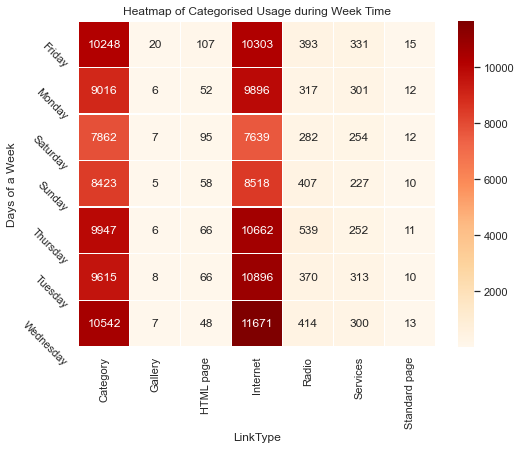

In [36]:
# Insert a column for weekday (e.g., Monday, Tuesday, etc.)
activity_dframe['Weekday'] = activity_dframe['Time'].dt.day_name()

sns.set()
# figure size in inches
plt.rcParams['figure.figsize'] = (8, 6)

weekday_linkType_dframe = activity_dframe[activity_dframe['Time']>'2020-01-01'].groupby(['Weekday', 'LinkType']).size().reset_index(name='count')
weekday_linkType_dframe = weekday_linkType_dframe.pivot("Weekday", "LinkType", "count")

sns.heatmap(weekday_linkType_dframe, fmt="d", annot=True, linewidths=.5, cmap="OrRd", annot_kws={"fontsize":12})
plt.title('Heatmap of Categorised Usage during Week Time', fontsize = 12)
plt.xlabel('LinkType', fontsize = 12)
plt.yticks(rotation=-45)
plt.ylabel('Days of a Week', fontsize = 12)

plt.show()

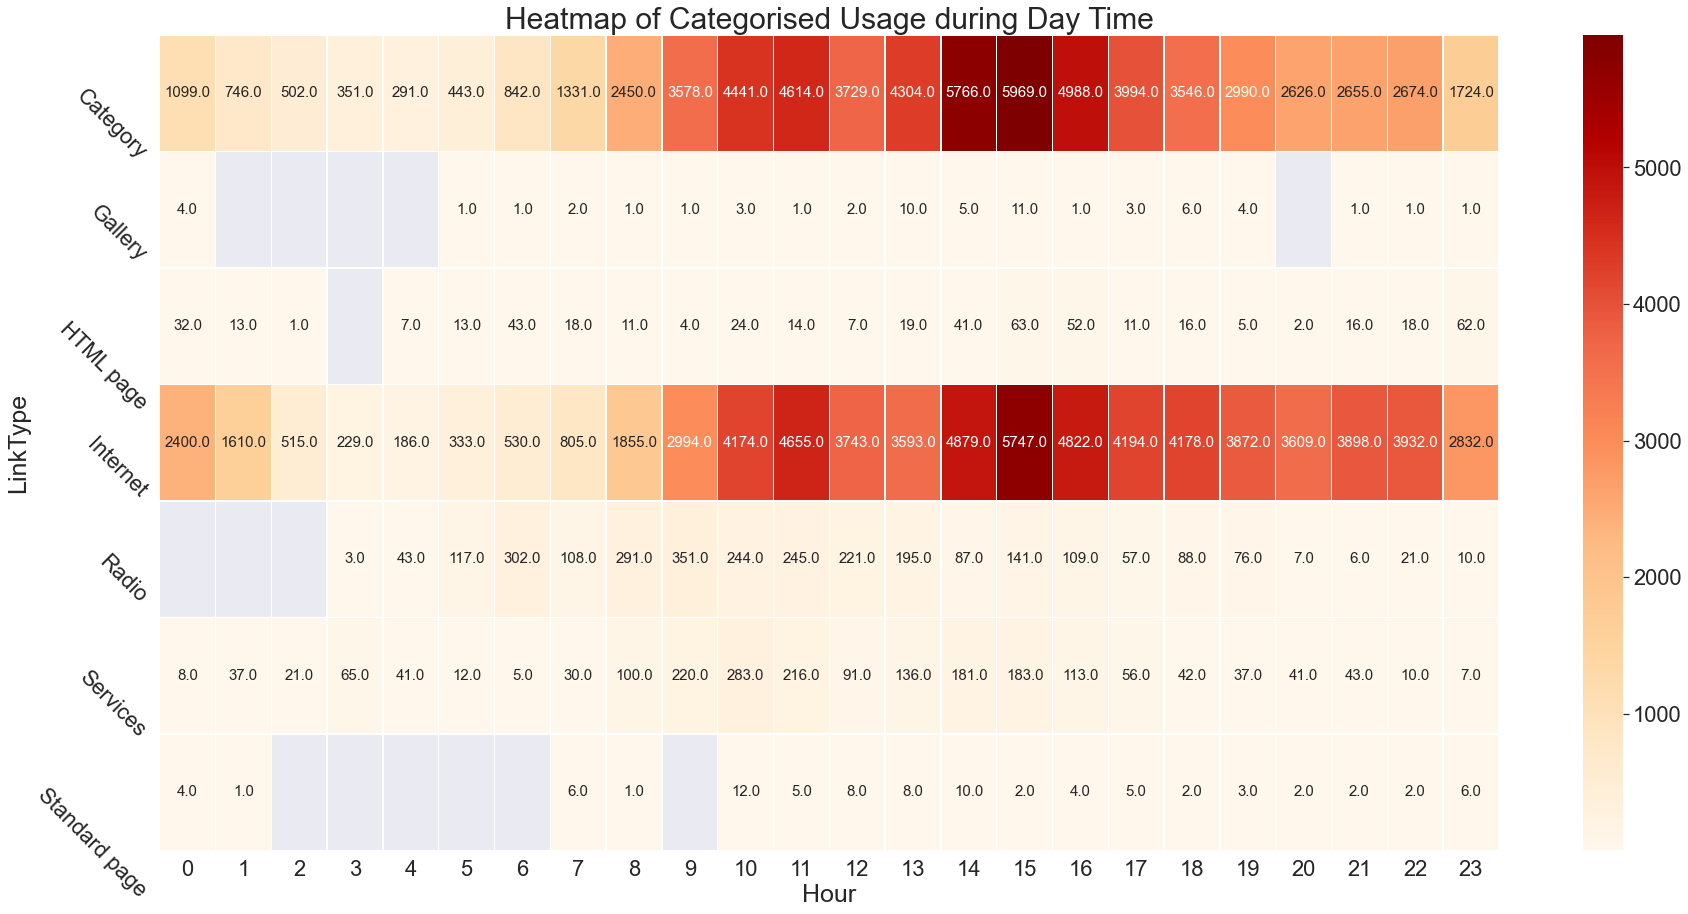

In [37]:
# Insert a column for hour (e.g., 1, 2, ..., 23)
activity_dframe['Timepoint'] = activity_dframe['Time'].dt.hour

sns.set(font_scale=2)
# figure size in inches
plt.rcParams['figure.figsize'] = (30, 15)

hour_linkType_dframe = activity_dframe[activity_dframe['Time']>'2020-01-01'].groupby(['Timepoint', 'LinkType']).size().reset_index(name='count')
hour_linkType_dframe = hour_linkType_dframe.pivot("LinkType","Timepoint", "count")

sns.heatmap(hour_linkType_dframe, fmt=".1f", annot=True, linewidths=.5, cmap="OrRd", annot_kws={"fontsize":15})
plt.title('Heatmap of Categorised Usage during Day Time', fontsize = 30)
plt.xlabel('Hour', fontsize = 25)
plt.yticks(rotation=-45)
plt.ylabel('LinkType', fontsize = 25)

plt.show()

___
Explanation:

From the Heatmap of Categorised Usage during Week Time:
- Users prefer to click 'Category' and 'Internet' most among 7 types of links
- I find that they use this system slightly more on weekdays yet on weekends they use relatively less

From the Heatmap of Categorised Usage during Day Time:
- Users utilise this system most in the afternoon from 2 to 3 pm
- In the midnight, compared with other types of activities, users' activities prefer to look through `Category` and `Internet`
- While, in the morning, there is a larger share of users to listen to radio against other time in a day
___

# Reflection
The data file includes usage records of users from Blackwood from the
bottom of 2018 to the end of October in 2020.
Firstly, I felt that the real-world raw dataset is more complex
than the samples which we exercised with before.
So, honestly, I spent such a lot of effort, time to clean the data
and less time on the following tasks.
The first step of the description helps me have an overall view of
the types and potential problems (e.g., data type, extra columns, etc.). Further, sorting out the possible causes of abnormal data is
an essential way to clean that data.

About the project exploration concerning to timeline,
I prefer to discover the usage of the CleverCogs system over
months, days, hours.
The experience to visualise temporal data is very beneficial.
We could probe the particular event and how to explore time
in combination with other data type.
Also, it is sensible to get familiar with data
but also think about its real-world context.
That is the core to sort out problem, patterns and reflection.

# Hypothesise

Are there missing data from the beginning of January 2020 to February 2020?

Because from the users' Usage of the system over the years,
there is an empty time slot in January 2020. Next, to acknowledge possible reasons to that no user status.

---

What is the reason for the increasing person-times in the mid-to-late March? Are there any events happening in the mid-to-late March 2020?

Because there are the increasing person-times and users in the mid-to-late March in the chart 'Counts of daily active users (DAU) since January,
2020' and 'Counts of person-times since January 2020'. Next, I am going to do further research about that period to look for the reasons users
used the system more.

---

Through the day time and week time, there are a large number of users
who looked through `category` and `Internet`.
What is the further content they looked through?

Because in the 'Heatmap of Categorised Usage during Week Time'
and 'Heatmap of Categorised Usage during Day Time',
there was obviously deeper colour in those two lines.
Next, to ask for data holders what is the category of `LinkTitle` of `Internet` and `category`
better acknowledge users' whole time interests.